In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [6]:
data = pd.read_csv('data/abalone.data')

In [7]:
data.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [11]:
col_name= ['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings']
data.columns=col_name

In [12]:
data.tail()

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4175,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [13]:
X = data.iloc[:, 1:]

In [14]:
X.head()

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [22]:
sex_num = {'F':1,
          'M':0}
data['sex']= data['Sex'].map(sex_num)

In [25]:
y = data['sex']
y.head()

0    0.0
1    1.0
2    0.0
3    NaN
4    NaN
Name: sex, dtype: float64

In [26]:
y.dropna()

0       0.0
1       1.0
2       0.0
5       1.0
6       1.0
7       0.0
8       1.0
9       1.0
10      0.0
11      0.0
12      1.0
13      1.0
14      0.0
16      1.0
17      0.0
18      0.0
19      0.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      0.0
27      0.0
28      0.0
29      0.0
30      1.0
31      0.0
32      1.0
33      1.0
       ... 
4134    1.0
4135    1.0
4136    0.0
4137    0.0
4138    1.0
4139    1.0
4140    1.0
4141    0.0
4142    1.0
4143    0.0
4144    0.0
4145    0.0
4146    0.0
4147    0.0
4155    0.0
4156    0.0
4158    1.0
4159    1.0
4160    1.0
4161    0.0
4166    0.0
4167    1.0
4168    0.0
4169    0.0
4170    0.0
4171    1.0
4172    0.0
4173    0.0
4174    1.0
4175    0.0
Name: sex, Length: 2834, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=26)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [30]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

/opt/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/opt/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
from sklearn.decomposition import PCA

/opt/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [32]:
pca = PCA(n_components=2)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
pca.explained_variance_ratio_

array([0.83476179, 0.08787527])

In [34]:
print(np.round(pca.explained_variance_ratio_, 2))

[0.83 0.09]


In [35]:
pd.DataFrame(np.round(pca.components_, 2), columns=X.columns).T

,0,1
Length,0.37,-0.07
Diam,0.37,-0.04
Height,0.34,0.07
Whole,0.38,-0.14
Shucked,0.36,-0.30
Viscera,0.37,-0.17
Shell,0.37,0.05
Rings,0.24,0.92


In [36]:
pca = PCA(n_components=None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca.transform(X_train_sc)

array([[ 2.01788318e+00, -3.71005927e-01,  3.48843383e-01, ...,
        -2.75776892e-01, -1.05590551e-01,  8.12575850e-03],
       [ 1.39430044e+00, -4.16396026e-01, -4.93097681e-01, ...,
        -1.09080151e-01, -7.56723938e-02, -1.40658970e-02],
       [ 2.24686378e+00,  6.63486261e-01, -4.11634408e-01, ...,
         5.99279481e-02, -2.35958285e-01,  1.05283235e-01],
       ...,
       [ 4.57110677e-01, -7.13800263e-01,  4.28665293e-01, ...,
        -1.21096619e-01,  7.54923124e-02,  7.10421246e-04],
       [-5.90196154e+00, -6.52479504e-01, -6.46303608e-01, ...,
         6.21845990e-03,  3.09590689e-01, -1.34775966e-02],
       [-1.58980774e+00, -5.90327389e-01,  2.21244010e-02, ...,
         9.40107579e-02,  5.53793196e-04, -2.99358980e-02]])

In [40]:
print(np.round(pca.explained_variance_ratio_,3))

[0.835 0.088 0.035 0.021 0.011 0.008 0.002 0.001]


In [41]:
np.cumsum(pca.explained_variance_ratio_)

array([0.83476179, 0.92263706, 0.95782682, 0.97857296, 0.98934096,
       0.99756096, 0.99919294, 1.        ])

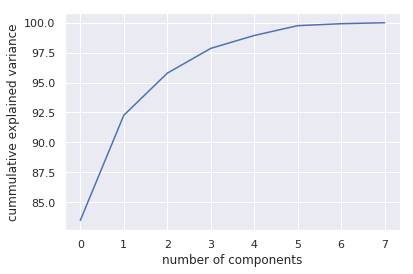

In [42]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100.)
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance');